In [1]:
# Functions

def remove_spines_and_ticks(ax):
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    return ax

def set_limiter(ax, x1, x2, y1, y2):
    ax.set_xlim(x1, x2)
    ax.set_ylim(y1, y2)
    return ax

def percent_women_degrees(ax, degree):
    ax.plot(women_degrees['Year'], women_degrees[degree], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[degree], c=cb_orange, label='Men', linewidth=3)
    return ax

def sorter(item, year):
    percentage = women_degrees[women_degrees['Year'] == year][item].iloc[0]
    return percentage

def set_ticks(ax, final):
    ax.set_yticks([0, 100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.5)
    
    if sp != final:
        ax.set_xticklabels([])
        
    return ax
    

C:\Users\Azia\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


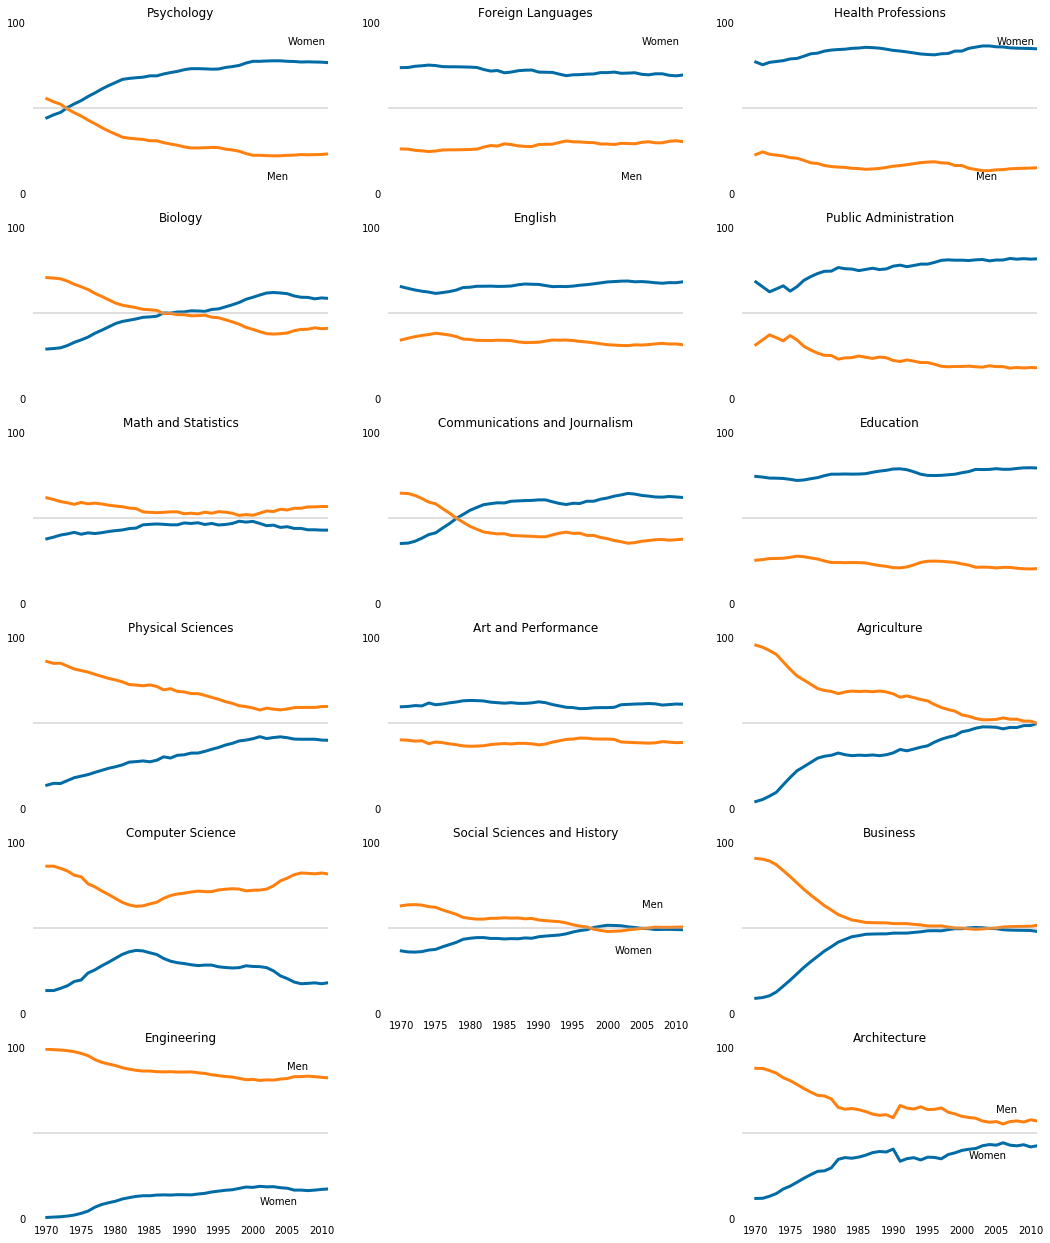

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']
stem_cats.sort(key=lambda x: sorter(x, 2011), reverse=True)
lib_arts_cats.sort(key=lambda x: sorter(x, 2011), reverse=True)
other_cats.sort(key=lambda x: sorter(x, 2011), reverse=True)

fig = plt.figure(figsize=(18, 22))

for sp in range(0,6):
    ax = fig.add_subplot(6,3,1 + (sp * 3))
    ax = percent_women_degrees(ax, stem_cats[sp])
    ax = remove_spines_and_ticks(ax)
    ax = set_limiter(ax, 1968, 2011, 0, 100)
    ax.set_title(stem_cats[sp])
    
    ax = set_ticks(ax, 5)
    
    if sp == 0:
        ax.text(2005, 87, 'Women')
        ax.text(2002, 8, 'Men')
    elif sp == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2001, 8, 'Women')

for sp in range(0,5):
    ax = fig.add_subplot(6,3,2 + (sp * 3))
    ax = percent_women_degrees(ax, lib_arts_cats[sp])
    ax = remove_spines_and_ticks(ax)
    ax = set_limiter(ax, 1968, 2011, 0, 100)
    ax.set_title(lib_arts_cats[sp])
    
    ax = set_ticks(ax, 4)
    
    if sp == 0:
        ax.text(2005, 87, 'Women')
        ax.text(2002, 8, 'Men')
    elif sp == 4:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        
for sp in range(0,6):
    ax = fig.add_subplot(6,3,3 + (sp * 3))
    ax = percent_women_degrees(ax, other_cats[sp])
    ax = remove_spines_and_ticks(ax)
    ax = set_limiter(ax, 1968, 2011, 0, 100)
    ax.set_title(other_cats[sp])
    
    ax = set_ticks(ax, 5)
    
    if sp == 0:
        ax.text(2005, 87, 'Women')
        ax.text(2002, 8, 'Men')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        
fig.savefig("degree_gender_percentage.png")
plt.show()